<a href="https://colab.research.google.com/github/AnnJungChan/TECHLOSS_SIGNLAB/blob/main/DATA_BASIC_STAT/CONTROL_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CONTROL과 의사결정나무

- CONTROL을 패턴이라고 본다면, 패턴을 자동적으로 인식하는 의사결정나무가 학습할 수 있지 않을까?

# 결론
- CONTROL은 패턴이 없다는 것이 확인되었다.

# 패키지 로딩

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 데이터 로딩

In [2]:
ECU = pd.read_csv('/content/gdrive/MyDrive/DB/ECU.csv')
ECU['CONTROL'] = ECU['CONTROL'].astype(str)

In [3]:
ECU['SHIP_ID'].unique()

array(['T140113-00101', 'T140113-00102', 'T140113-00103', 'T140113-00104',
       'T140128-00703', 'T140703-00101', 'T140708-00101', 'T141027-00501',
       'T160127-00202', 'T170102-00101', 'T20180208001', 'T20180614001',
       'T20181218003', 'T20190115004', 'T20190324001', 'T20190527002',
       'T20191014001', 'T20191016008', 'T20200218004', 'T20200603001',
       'T20201209001', 'T20201210002', 'T20201210003', 'T20201210004',
       'T20201210005', 'T20201210006', 'T20201210008', 'T20210521011',
       'UnkownShip', 'T20191119009', 'T20181031003', 'T140110-00206',
       'T20201110002', 'T20180910004', 'T20200113001'], dtype=object)

# CONTROL값을 여러개 가져서 CONTROL에 따라 완벽하게 분기되지 않는 호선

- T20200113001호선의 경우, 엔트로피 지수가 0일때까지 완벽하게 분리되지 않는다는 사실을 알 수 있다.

- 즉, 이 호선에서는 CONTROL값이 분기 되지도 않기 때문에 의미가 없다라고 판단할 수 있다.

## T20200113001

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


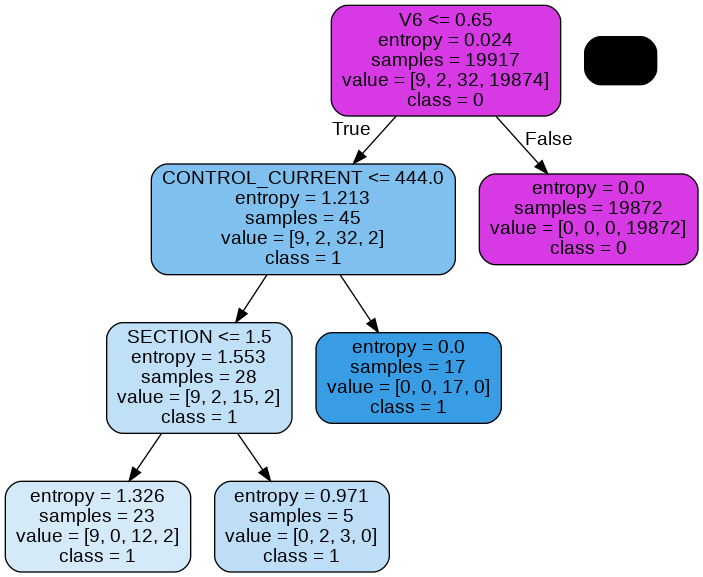

In [4]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20200113001',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

V6에서 한번 분기되고, CONTROL_CURRENT에서 한번 분기되며, SECTION에서 마지막으로 분기되는 것을 확인할 수 있다.

하지만, 정확하게 분기되지는 않는다.

# CONTROL 값을 여러개 가져서 CONTROL에 따라 완벽하게 분기되는 호선

- CONTROL값을 여러개 가지면서, 각각의 CONTROL마다 엔트로피 지수가 0인 호선들을 말한다.

- 특정한 규칙성을 가지진 않지만, 그래도 엔트로피 지수가 0으로 분기된다는 것으로 볼 때, 호선별로 특정한 규칙을 가지고 분기된다는 사실을 알 수 있다.

## T140113_00103

### 데이터셋 구축

In [5]:
T140113_00103 = ECU.loc[ECU['SHIP_ID'] == 'T140113-00103',:]
T140113_00103.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=T140113_00103['CONTROL']
X=T140113_00103.drop(columns = ['CONTROL'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 의사결정나무 구현

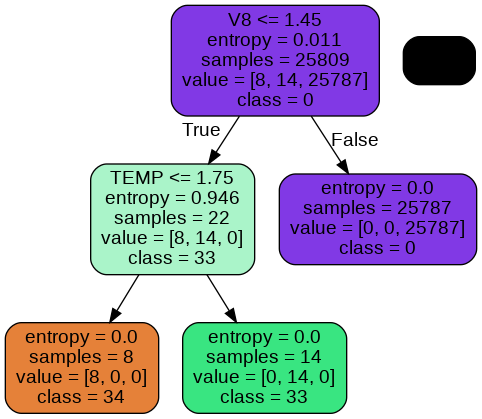

In [6]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T141027-00501

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


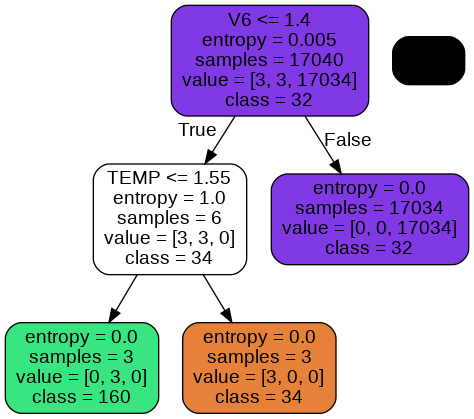

In [7]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T141027-00501',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20180208001

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


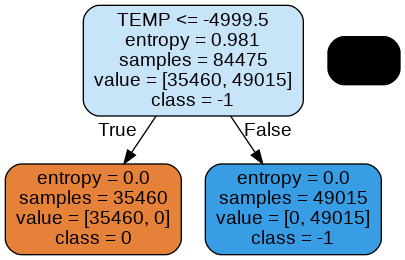

In [8]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20180208001',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20180614001

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


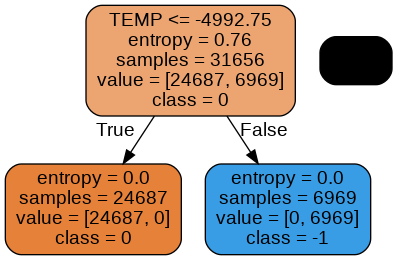

In [9]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20180614001',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20190527002

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


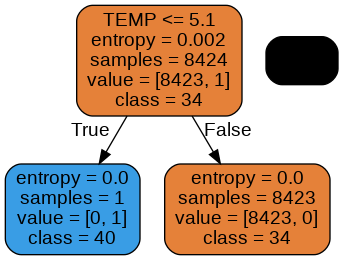

In [10]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20190527002',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20201209001

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


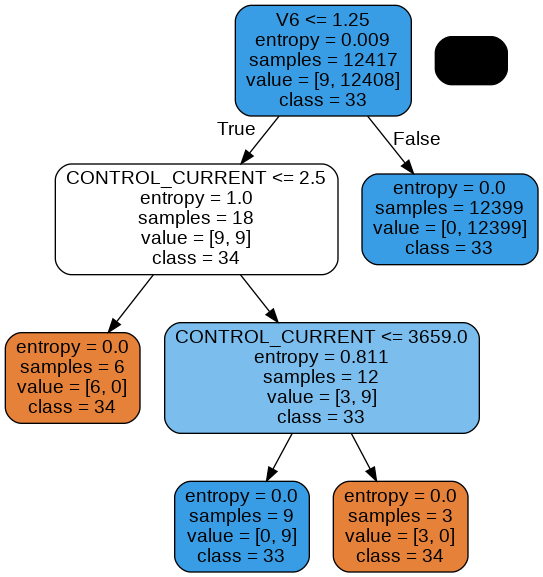

In [11]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20201209001',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20201210003

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


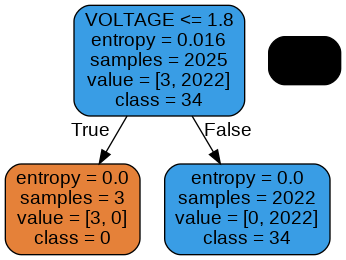

In [12]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20201210003',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20210521011

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


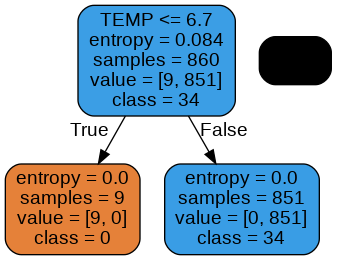

In [13]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20210521011',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# CONTROL값을 하나만 가져서 의미가 없는 호선들

## T140113_00101

### 데이터셋 구축

In [14]:
T140113_00101 = ECU.loc[ECU['SHIP_ID'] == 'T140113-00101',:]

In [15]:
T140113_00101.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
Y=T140113_00101['CONTROL']

In [17]:
X=T140113_00101.drop(columns = ['CONTROL'])

In [18]:
Y.unique()

array(['-1'], dtype=object)

### 의사결정나무 구현

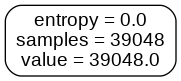

In [19]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=["-1"], filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


## T140113_00102

### 데이터셋 구축

In [20]:
T140113_00102 = ECU.loc[ECU['SHIP_ID'] == 'T140113-00102',:]

In [21]:
T140113_00102.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
Y=T140113_00102['CONTROL']

In [23]:
X=T140113_00102.drop(columns = ['CONTROL'])

In [24]:
Y.unique()

array(['-1'], dtype=object)

### 의사결정나무 구현

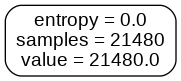

In [25]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=["-1"], filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T140113_00104

### 데이터셋 구축

In [26]:
T140113_00104 = ECU.loc[ECU['SHIP_ID'] == 'T140113-00104',:]
T140113_00104.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=T140113_00104['CONTROL']
X=T140113_00104.drop(columns = ['CONTROL'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 의사결정나무 구현

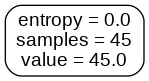

In [27]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T140128_00703

### 데이터셋 구축

In [28]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T140128-00703',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### 의사결정나무 구현

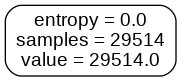

In [29]:
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T140703-00101

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


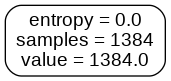

In [30]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T140703-00101',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T140708-00101

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


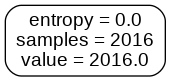

In [31]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T140708-00101',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T160127-00202

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


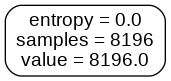

In [32]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T160127-00202',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T170102-00101

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


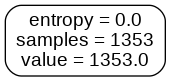

In [33]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T170102-00101',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20181218003

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


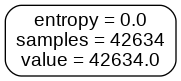

In [34]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20181218003',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20190115004

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


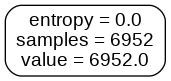

In [35]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20190115004',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20190324001

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


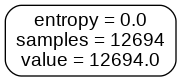

In [36]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20190324001',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20191014001

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


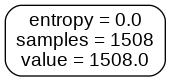

In [37]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20191014001',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20191016008

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


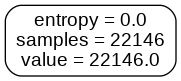

In [38]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20191016008',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20200218004

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


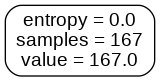

In [39]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20200218004',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20200603001

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


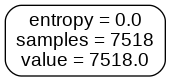

In [40]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20200603001',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20201210002

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


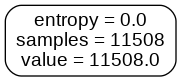

In [41]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20201210002',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20201210004

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


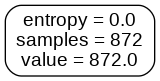

In [42]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20201210004',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20201210005

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


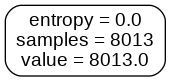

In [43]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20201210005',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20201210006

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


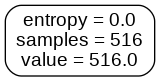

In [44]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20201210006',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20201210008

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


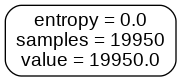

In [45]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20201210008',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## UnkownShip

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


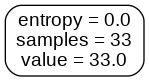

In [46]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'UnkownShip',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20191119009

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


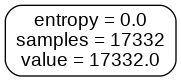

In [47]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20191119009',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20181031003

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


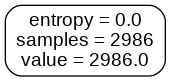

In [48]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20181031003',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T140110-00206

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


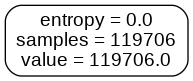

In [49]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T140110-00206',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20201110002

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


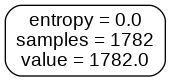

In [50]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20201110002',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## T20180910004

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


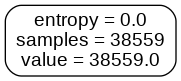

In [51]:
SHIP = ECU.loc[ECU['SHIP_ID'] == 'T20180910004',:]
SHIP.drop(columns = ['SHIP_ID', 'D_INDEX', 'DEVICE_ID','SYSTEM'], inplace=True)
Y=SHIP['CONTROL']
X=SHIP.drop(columns = ['CONTROL'])
dtree = DecisionTreeClassifier(criterion='entropy',random_state=1636, max_depth=4)
dtree.fit(X,Y)
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=Y.unique(), filled=True,  impurity=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())